In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import os
import re
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut, KFold, train_test_split

In [2]:
df_bank = pd.read_csv("bank.csv")

In [3]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,55,services,divorced,secondary,no,2166,yes,no,unknown,28,may,23,17,-1,0,unknown,no
11158,32,blue-collar,married,secondary,no,130,yes,no,cellular,6,may,302,2,-1,0,unknown,no
11159,52,admin.,divorced,secondary,no,48,no,yes,cellular,17,nov,591,1,-1,0,unknown,no
11160,38,unemployed,divorced,secondary,no,189,yes,yes,cellular,21,jul,105,2,-1,0,unknown,no


In [4]:
col = df_bank.columns
print(col)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [5]:
df_bank.shape

(11162, 17)

In [6]:
#check missing values
missing_var= df_bank.isnull().sum()
print(missing_var)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
for col in ['job','marital', 'education', 'default', 'housing',
            'contact', 'month', 'poutcome','deposit','loan']:
    df_bank[col] = df_bank[col].astype('category')

In [9]:
df_bank.select_dtypes(include=['category']).nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64

In [10]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [11]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  int64   
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   default    11162 non-null  category
 5   balance    11162 non-null  int64   
 6   housing    11162 non-null  category
 7   loan       11162 non-null  category
 8   contact    11162 non-null  category
 9   day        11162 non-null  int64   
 10  month      11162 non-null  category
 11  duration   11162 non-null  int64   
 12  campaign   11162 non-null  int64   
 13  pdays      11162 non-null  int64   
 14  previous   11162 non-null  int64   
 15  poutcome   11162 non-null  category
 16  deposit    11162 non-null  category
dtypes: category(10), int64(7)
memory usage: 721.3 KB


Number of Not Deposited:  5873
Number ofDeposited:  5289


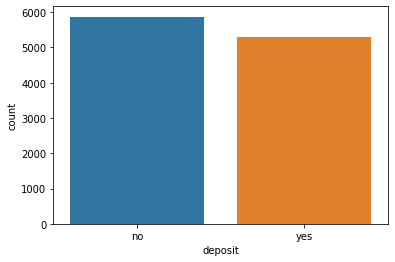

In [12]:
y = df_bank.deposit    
ax = sns.countplot(y,label="Count") 
Rejected, Accepted = y.value_counts()
print('Number of Not Deposited: ',Rejected)
print('Number ofDeposited: ',Accepted)

In [13]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df_bank['job']     = lb.fit_transform(df_bank['job']) 
df_bank['marital']  = lb.fit_transform(df_bank['marital']) 
df_bank['education']= lb.fit_transform(df_bank['education']) 
df_bank['default']  = lb.fit_transform(df_bank['default']) 
df_bank['housing'] = lb.fit_transform(df_bank['housing']) 
df_bank['loan'] = lb.fit_transform(df_bank['loan']) 
df_bank['contact'] = lb.fit_transform(df_bank['contact']) 
df_bank['month'] = lb.fit_transform(df_bank['month']) 
df_bank['poutcome']= lb.fit_transform(df_bank['poutcome'])
df_bank['deposit']= lb.fit_transform(df_bank['deposit']) 


In [14]:
col = df_bank.columns
print(col)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [15]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,0,0,0,2343,1,0,0,5,0,1042,1,-1,0,0,1
1,56,1,0,0,0,45,0,0,0,5,0,1467,1,-1,0,0,1
2,41,0,0,0,0,1270,1,0,0,5,0,1389,1,-1,0,0,1
3,55,0,0,0,0,2476,1,0,0,5,0,579,1,-1,0,0,1
4,54,1,0,0,0,184,0,0,0,5,0,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,55,0,1,0,0,2166,1,0,0,28,0,23,17,-1,0,0,0
11158,32,0,0,0,0,130,1,0,1,6,0,302,2,-1,0,0,0
11159,52,1,1,0,0,48,0,1,1,17,0,591,1,-1,0,0,0
11160,38,0,1,0,0,189,1,1,1,21,0,105,2,-1,0,0,0


In [16]:
from sklearn.preprocessing import LabelBinarizer
x = df_bank

In [17]:
Data_voline_1 = pd.melt(x,id_vars=['deposit'],
                    value_vars=['job', 'marital', 'education', 'default',  'housing',
                               'loan', 'contact',  'month', 'poutcome'],
                    value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

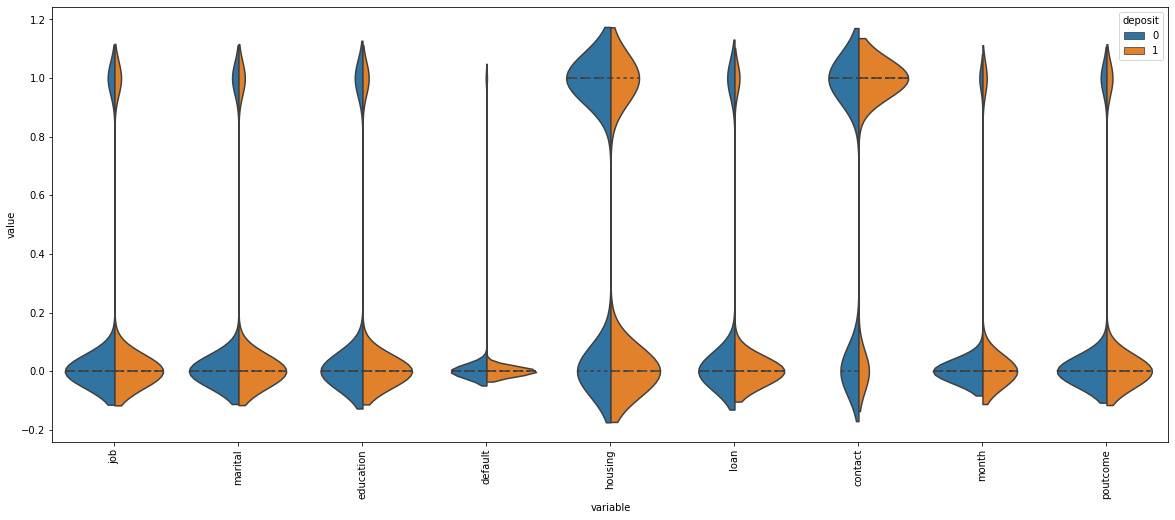

In [18]:
plt.figure(figsize=(20,8))
sns.violinplot(x="variable", y="value", hue="deposit", data=Data_voline_1,split=True, inner="quart")
plt.xticks(rotation=90)

In [19]:
Data_voline_2 = pd.melt(x,id_vars=['deposit'],
                    value_vars=['age','day'],
                    value_name='value')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

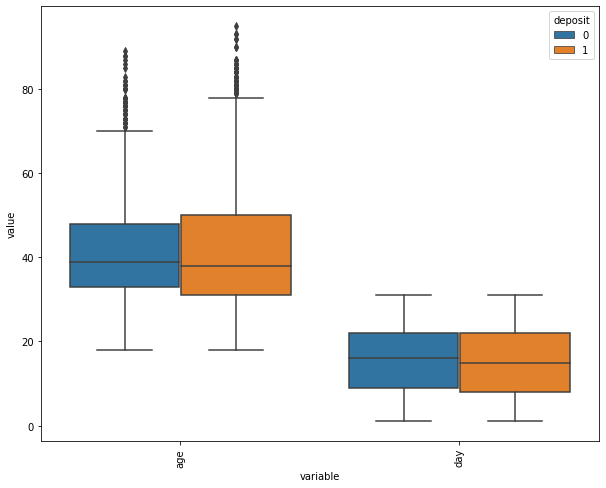

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(x="variable", y="value", hue="deposit", data=Data_voline_2)
plt.xticks(rotation=90)  

### Feature Importance Using Xgboost

In [21]:
df_Features = df_bank.drop('deposit',axis=1)
df_target = df_bank['deposit']

In [22]:
import xgboost as xgb
from sklearn import model_selection, preprocessing
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix( df_Features, df_target, feature_names=df_Features.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100,verbose_eval=False)
remain_num = 99

[23:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:15:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




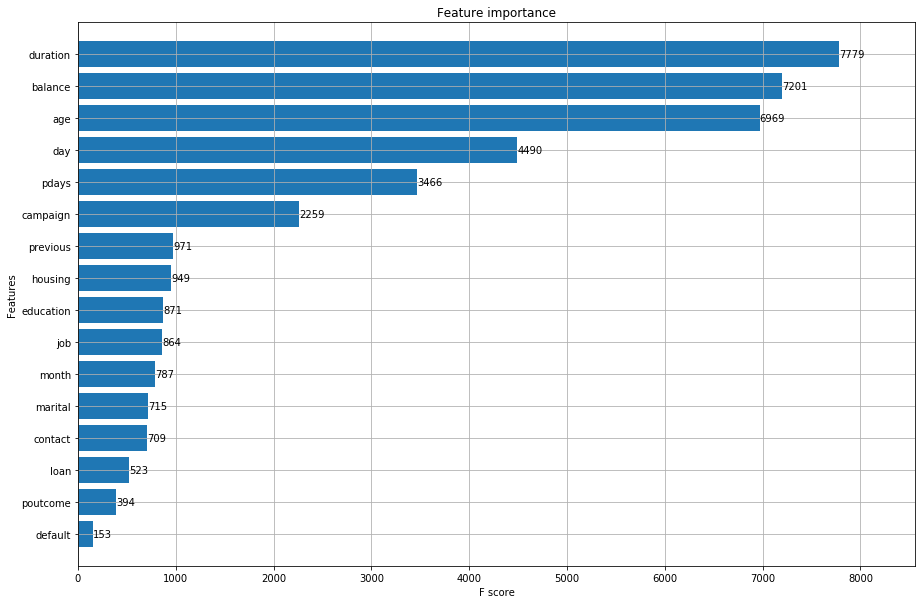

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()

In [24]:

df_Features = df_Features.drop('default',axis=1)

### Decision Tree Classifier

In [25]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler1 = StandardScaler()
df_Features_scaled = scaler1.fit_transform(df_Features)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_Features_scaled, df_target, test_size=0.25, random_state=42)

In [27]:
from sklearn import decomposition, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
pca = decomposition.PCA()

In [28]:
decisiontree = DecisionTreeClassifier()
pipe = Pipeline(steps=[('pca', pca),
                       ('decisiontree', decisiontree)])
n_components = list(range(1,X_train.shape[1]+1,1))

In [29]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = [{
            'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
            'decisiontree__criterion': ['gini', 'entropy'],
            'decisiontree__max_depth': [4,6,8,12,20]
            }]

DecisionTree_grid = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 5, n_jobs = -1 , verbose=2, refit = True)
DecisionTree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   32.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('decisiontree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=

In [30]:
 print(DecisionTree_grid.best_estimator_.get_params()['decisiontree'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [31]:
DecisionTree_final_model= DecisionTree_grid.best_estimator_

In [32]:
print("Training set score for Decision Tree model: %f" % DecisionTree_final_model.score(X_train,y_train))
print("Testing  set score for Decision Tree model: %f" % DecisionTree_final_model.score(X_test,y_test))

Training set score for Decision Tree model: 0.829650
Testing  set score for Decision Tree model: 0.770333


In [33]:
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True,cmap="YlGnBu", fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [34]:
y_test_predictions= DecisionTree_final_model.predict(X_test)

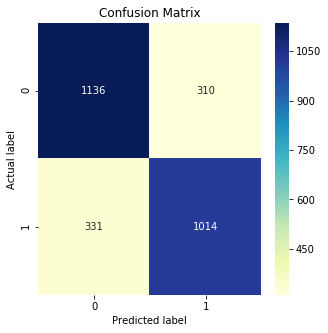

In [35]:
plot_cm(y_test,y_test_predictions)

### XGBoost Model

In [36]:
import xgboost as xgb
XGBoost =xgb.XGBClassifier()

In [37]:
#parameter turning for XGB 
parameters = {'pca_n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
              'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], 
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'n_estimators': [5],
              'missing':[-999],
              'seed': [1337]}

xgb_grid = GridSearchCV(XGBoost, parameters,  cv = 5, n_jobs = -1, verbose=2,scoring='roc_auc', refit = True)

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
             param_grid={'learning_rate': [0.05], 'max_depth': [6],
                         'min_child_weight': [11], 'missing': [-999],
                         'n_estimators': [5], 'nthread': [4],
                         'objective': ['binary:logistic'],
                        

In [38]:
 print(xgb_grid.best_estimator_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints=None,
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', pca_n_components=1,
              random_state=1337, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method=None,
              validate_parameters=False, ...)


In [39]:
XGBoost_final_model= xgb_grid.best_estimator_

In [40]:
print("Training set score for XGBoost model: %f" % XGBoost_final_model.score(X_train,y_train))
print("Testing  set score for XGBoost model: %f" % XGBoost_final_model.score(X_test,y_test))

Training set score for XGBoost model: 0.816032
Testing  set score for XGBoost model: 0.802580


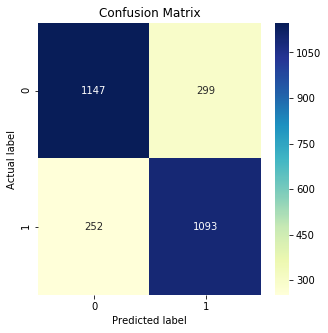

In [41]:
y_test_predictions= XGBoost_final_model.predict(X_test)
plot_cm(y_test,y_test_predictions)

### Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=40)
pipe = Pipeline(steps=[('pca', pca),
                       ('randomforest', randomForest)])

In [43]:
param_grid =[{
              'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
               'randomforest__n_estimators':[100,150,200,250],
               'randomforest__criterion':['gini', 'entropy'],
               'randomforest__max_depth':[4,8,12,15]}]

RandomForest_search = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 2, n_jobs = -1 , verbose=2, refit = True)
RandomForest_search.fit(X_train,y_train.ravel())

Fitting 2 folds for each of 512 candidates, totalling 1024 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed: 13.1min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('randomforest',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto

In [44]:
print(RandomForest_search.best_estimator_.get_params()['randomforest'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)


In [45]:
RandomForest_final_model= RandomForest_search.best_estimator_

In [46]:
print("Training set score for Random Forest model: %f" % RandomForest_final_model.score(X_train,y_train))
print("Testing  set score for Random Forest model: %f" % RandomForest_final_model.score(X_test,y_test))

Training set score for Random Forest model: 0.943018
Testing  set score for Random Forest model: 0.808671


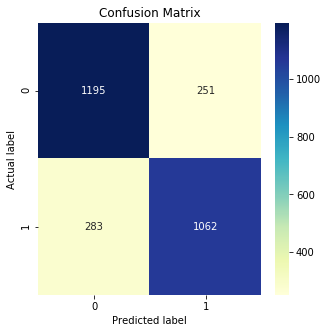

In [47]:
y_test_predictions= RandomForest_final_model.predict(X_test)
plot_cm(y_test,y_test_predictions)

### Bagging Model

In [48]:
from sklearn.ensemble import BaggingClassifier
baggCls=BaggingClassifier(base_estimator=decisiontree)

In [49]:
pipe = Pipeline(steps=[('pca', pca),
                       ('baggcls', baggCls)])

In [50]:
param_grid = [{
            'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
            'baggcls__n_estimators':[100,200,300],
            'baggcls__max_samples': [1.0,2.0,0.5]
            }]

Bagging_grid = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 2, n_jobs = -1 , verbose=2, refit = True)
Bagging_grid.fit(X_train,y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  5.6min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('baggcls',
                                        BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                                class_weight=None,
                                                                                                criterion='gini',
                                                                                                max_depth=None,
                                 

In [51]:
print(Bagging_grid.best_estimator_.get_params()['baggcls'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [52]:
Bagging_final_model= Bagging_grid.best_estimator_

In [53]:
print("Training set score for Bagging model: %f" % Bagging_final_model.score(X_train,y_train))
print("Testing  set score for Bagging model: %f" % Bagging_final_model.score(X_test,y_test))

Training set score for Bagging model: 0.962728
Testing  set score for Bagging model: 0.802938


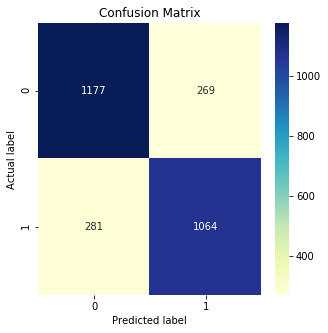

In [54]:
y_test_predictions= Bagging_final_model.predict(X_test)
plot_cm(y_test,y_test_predictions)